In [1]:
# Cell: project root in path (unchanged)
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [ ]:
# Cell: imports and config
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from novann.core import (
    FASHION_TRAIN_DATA_PATH, 
    MNIST_TRAIN_DATA_PATH, 
    EXPORTATION_FASHION_TRAIN_DATA_PATH, 
    EXPORTATION_MNIST_TRAIN_DATA_PATH, 
    MNIST_VALIDATION_DATA_PATH, 
    FASHION_VALIDATION_DATA_PATH
) 

In [3]:
# Cell: load datasets
fashion = pd.read_csv(FASHION_TRAIN_DATA_PATH, dtype_backend='pyarrow')
mnist = pd.read_csv(MNIST_TRAIN_DATA_PATH, dtype_backend='pyarrow')

# Rename label columns
mnist.rename(columns={"6":"label"}, inplace=True)

In [4]:
# Cell: simple inspections
fashion.head()
mnist.head()
fashion.info()
mnist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64[pyarrow](785)
memory usage: 359.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Columns: 785 entries, label to 0.590
dtypes: int64[pyarrow](785)
memory usage: 119.8 MB


In [5]:
# Cell: split datasets
division = 0.16666666666666667  # ensures 10k samples for Fashion subset

fashion_label_col = 'label'
mnist_label_col = 'label'
f_x_train, f_x_val, f_y_train, f_y_val = train_test_split(
    fashion.drop(columns=[fashion_label_col]), fashion[fashion_label_col],
    test_size=division, stratify=fashion[fashion_label_col], random_state=9
)

m_x_train, m_x_val, m_y_train, m_y_val = train_test_split(
    mnist.drop(columns=[mnist_label_col]), mnist[mnist_label_col],
    test_size=0.25, stratify=mnist[mnist_label_col], random_state=9
)

In [6]:
# Cell: concatenate and prepare export DataFrames
fashion_df_val = pd.concat([f_y_val.reset_index(drop=True), f_x_val.reset_index(drop=True)], axis=1)
fashion_df_train = pd.concat([f_y_train.reset_index(drop=True), f_x_train.reset_index(drop=True)], axis=1)

mnist_df_val = pd.concat([m_y_val.reset_index(drop=True), m_x_val.reset_index(drop=True)], axis=1)
mnist_df_train = pd.concat([m_y_train.reset_index(drop=True), m_x_train.reset_index(drop=True)], axis=1)

In [7]:
# Cell: export splits safely
def _safe_to_csv(df, path, description):
    if path:
        df.to_csv(path, index=False)
    else:
        print(f"Skipping export for {description}: target path not set in config.")

_safe_to_csv(mnist_df_val, MNIST_VALIDATION_DATA_PATH, "MNIST validation")
_safe_to_csv(mnist_df_train, EXPORTATION_MNIST_TRAIN_DATA_PATH, "MNIST train export")
_safe_to_csv(fashion_df_val, FASHION_VALIDATION_DATA_PATH, "Fashion validation")
_safe_to_csv(fashion_df_train, EXPORTATION_FASHION_TRAIN_DATA_PATH, "Fashion train export")

In [8]:
# Cell: helper to show an image
def show_image(image: np.ndarray):
    """Display a single flattened image (assumes 28x28 pixels when reshapeable)."""
    try:
        image = image.reshape(28, 28)
    except Exception as e:
        print(f"Can't reshape to (28,28) the image with shape {np.shape(image)}: ", e)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

In [9]:
f_x_val.shape, f_x_train.shape, m_x_val.shape, m_x_train.shape

((10000, 784), (50000, 784), (5000, 784), (14999, 784))

Fashion MNIST sample:


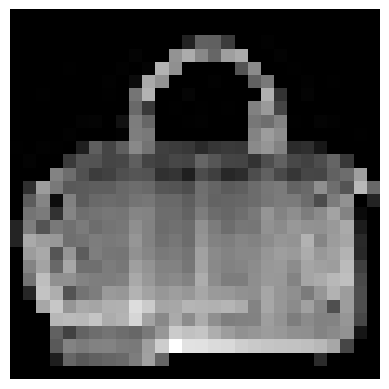

MNIST sample:


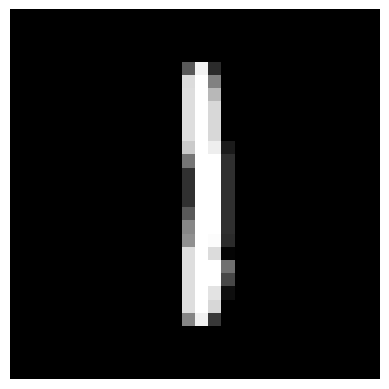

In [10]:
# Cell: pick random sample and display
f_idx = np.random.randint(0, f_x_val.shape[0])
m_idx = np.random.randint(0, m_x_val.shape[0])

# Convert row to numpy array and display
f_img = np.asarray(f_x_val.iloc[f_idx, :].values, dtype=np.float32)
print('Fashion MNIST sample:')
show_image(f_img)

m_img = np.asarray(m_x_val.iloc[m_idx, :].values, dtype=np.float32)
print('MNIST sample:')
show_image(m_img)